In [2]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [3]:
import sys
import os

import numpy as np
import random
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt
import seaborn as sns

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

utils.reset_seeds(0)

## Eelmise NB mudel et oleks võrrelda 

In [129]:
def train_model_nb(trainX, nn_size=(10,10), optimizer=keras.optimizers.Adam(learning_rate=0.005, amsgrad=True), epochs=4000, batch_size=64, fn=lambda x: x*np.sin(x), reverse=False):
    utils.reset_seeds(2002)

    model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=nn_size[0], activation='relu', name="layer_1"),
        layers.Dense(units=nn_size[1], activation='relu', name="layer_2"),
        layers.Dense(units=2, activation='linear', name="layer_3")
    ])

    X = trainX
    y = fn(X) + 0.3 * np.random.randn(len(X)) + \
        0.3 * X * np.random.randn(len(X))
    if reverse:
        y = fn(X)[::-1] + 0.3 * np.random.randn(len(X)) + \
            0.3 * X[::-1] * np.random.randn(len(X))        

    X_truth = np.linspace(-4, 14, 2000)
    ground_truth = X_truth * np.sin(X_truth)

    X_train, y_train = X, y
    # X_valid, y_valid = np.linspace(-1.2, 1.2,10000), np.linspace(-1.2, 1.2, 10000)**2

    model.compile(
        optimizer=optimizer,
        loss=utils.neg_log_likelihood,
        # metrics=[keras.metrics.MeanSquaredError()],
    )

    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0,
                  callbacks=[CustomLogger(100)], shuffle=True)
    return model, h, (X, y, X_truth, ground_truth)



def fn(x): return x*np.sin(x)

# X_train = np.linspace(0, 10, 500)
# model, h, (X_train, y_train, X_truth, ground_truth) = train_model_nb(X_train)

model contains 18 breaks
63/63 [==============================] - 0s 2ms/step


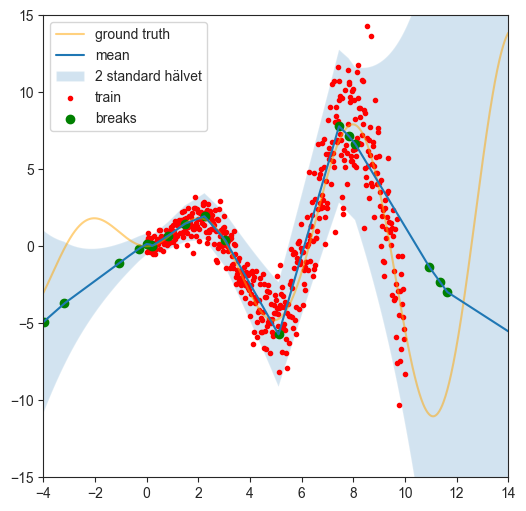

In [48]:
utils.joonista_variance(model, X_truth, X_train, y_train, xlim=(-4, 14),
                  ylim=(-15, 15), ground_truth=lambda x: x*np.sin(x))

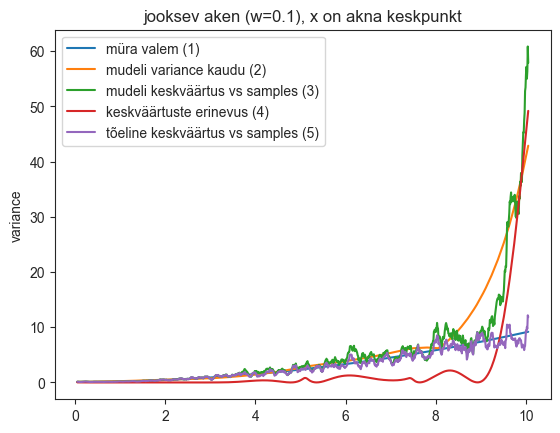

In [52]:
rmses = utils.joonista_rmses5x(model, start=0, end=10, steps=1000, fn=fn, akna_laius=0.1)

## Ainult 50 punkti

In [53]:
X_train = np.linspace(0, 10, 50)
# del X_train[10:40:2]
# X_train = np.array(X_train)
model, h, (X_train, y_train, X_truth, ground_truth) = train_model_nb(X_train)

Epoch:   0 | Loss: 3.61072e+00
Epoch: 100 | Loss: 3.14208e+00
Epoch: 200 | Loss: 3.08485e+00
Epoch: 300 | Loss: 3.00480e+00
Epoch: 400 | Loss: 2.90553e+00
Epoch: 500 | Loss: 2.74815e+00
Epoch: 600 | Loss: 2.61721e+00
Epoch: 700 | Loss: 2.65318e+00
Epoch: 800 | Loss: 2.58094e+00
Epoch: 900 | Loss: 2.51784e+00
Epoch: 1000 | Loss: 2.42466e+00
Epoch: 1100 | Loss: 2.25093e+00
Epoch: 1200 | Loss: 2.15185e+00
Epoch: 1300 | Loss: 2.89491e+00
Epoch: 1400 | Loss: 2.09287e+00
Epoch: 1500 | Loss: 2.11976e+00
Epoch: 1600 | Loss: 2.08857e+00
Epoch: 1700 | Loss: 2.06620e+00
Epoch: 1800 | Loss: 2.12845e+00
Epoch: 1900 | Loss: 1.87223e+00
Epoch: 2000 | Loss: 1.75977e+00
Epoch: 2100 | Loss: 1.65727e+00
Epoch: 2200 | Loss: 1.56815e+00
Epoch: 2300 | Loss: 1.65403e+00
Epoch: 2400 | Loss: 1.53292e+00
Epoch: 2500 | Loss: 1.51373e+00
Epoch: 2600 | Loss: 1.50024e+00
Epoch: 2700 | Loss: 1.50905e+00
Epoch: 2800 | Loss: 1.49543e+00
Epoch: 2900 | Loss: 1.53024e+00
Epoch: 3000 | Loss: 1.50331e+00
Epoch: 3100 | Loss

model contains 15 breaks
63/63 [==============================] - 0s 3ms/step


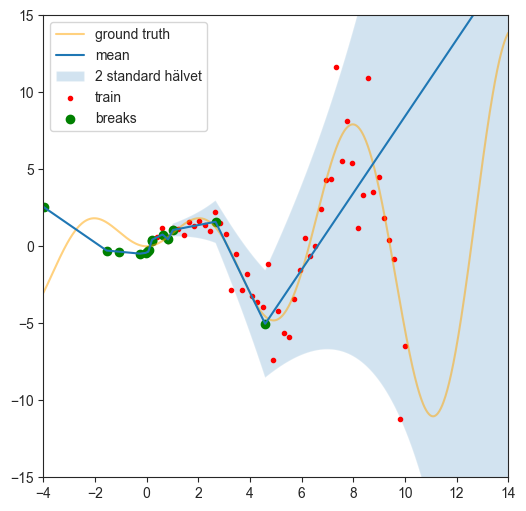

In [54]:
utils.joonista_variance(model, X_truth, X_train, y_train, xlim=(-4, 14),
                  ylim=(-15, 15), ground_truth=lambda x: x*np.sin(x))

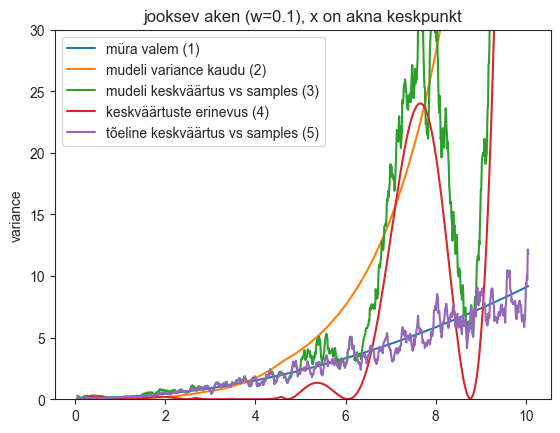

In [56]:
rmses = utils.joonista_rmses5x(model, start=0, end=10, steps=1000, fn=fn, akna_laius=0.1)

### hypo 1+4=3

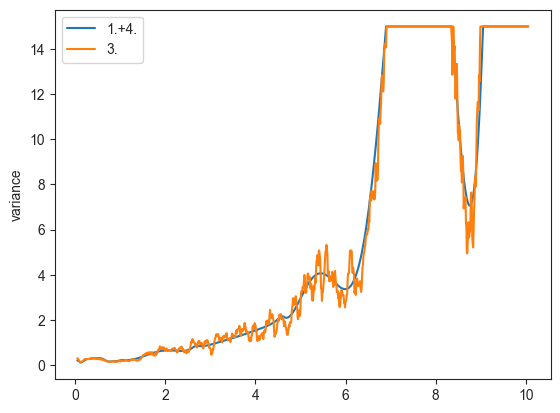

In [61]:
utils.joonista_hypotees_143(rmses)

### hypo 2 >= 1

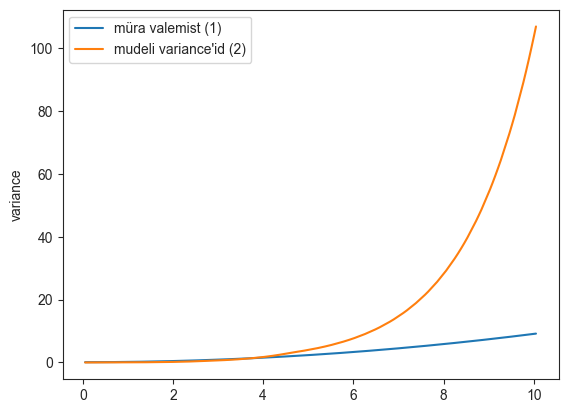

In [66]:
utils.joonista_hypotees_2gt1(rmses)

## Jätame keskmisesse piirkonda 2x vähem andmeid

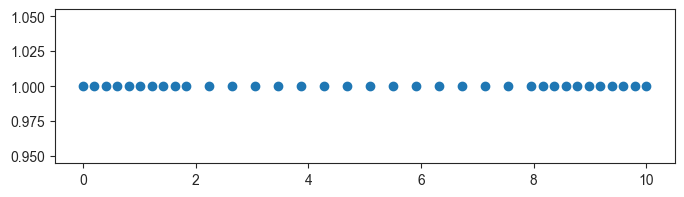

In [91]:
X_train = list(np.linspace(0, 10, 50))
del X_train[10:40:2]
X_train = np.array(X_train)

fig,ax = plt.subplots(figsize=(8,2))
ax.plot(X_train, [1]*len(X_train), 'o', label='train')

In [103]:
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)
model, h, (X_train, y_train, X_truth, ground_truth) = train_model_nb(X_train, nn_size=(10,10), optimizer=opt, batch_size=8, epochs=10000)

Epoch:   0 | Loss: 3.44819e+00
Epoch: 100 | Loss: 2.94440e+00
Epoch: 200 | Loss: 2.91955e+00
Epoch: 300 | Loss: 2.89122e+00
Epoch: 400 | Loss: 2.77947e+00
Epoch: 500 | Loss: 2.68505e+00
Epoch: 600 | Loss: 2.64635e+00
Epoch: 700 | Loss: 2.59516e+00
Epoch: 800 | Loss: 2.58630e+00
Epoch: 900 | Loss: 2.55645e+00
Epoch: 1000 | Loss: 2.53123e+00
Epoch: 1100 | Loss: 2.51610e+00
Epoch: 1200 | Loss: 2.50634e+00
Epoch: 1300 | Loss: 2.50894e+00
Epoch: 1400 | Loss: 2.46949e+00
Epoch: 1500 | Loss: 2.49017e+00
Epoch: 1600 | Loss: 2.46419e+00
Epoch: 1700 | Loss: 2.44909e+00
Epoch: 1800 | Loss: 2.43315e+00
Epoch: 1900 | Loss: 2.44411e+00
Epoch: 2000 | Loss: 2.40409e+00
Epoch: 2100 | Loss: 2.40656e+00
Epoch: 2200 | Loss: 2.40907e+00
Epoch: 2300 | Loss: 2.40902e+00
Epoch: 2400 | Loss: 2.35835e+00
Epoch: 2500 | Loss: 2.30003e+00
Epoch: 2600 | Loss: 2.16296e+00
Epoch: 2700 | Loss: 2.07386e+00
Epoch: 2800 | Loss: 2.02208e+00
Epoch: 2900 | Loss: 2.03306e+00
Epoch: 3000 | Loss: 1.90012e+00
Epoch: 3100 | Loss

model contains 16 breaks
63/63 [==============================] - 0s 3ms/step


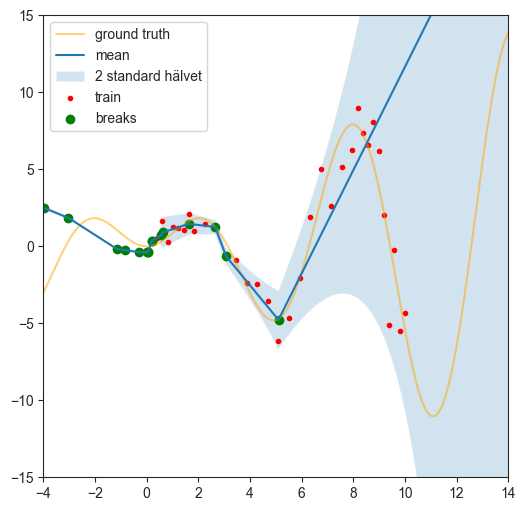

In [104]:
utils.joonista_variance(model, X_truth, X_train, y_train, xlim=(-4, 14),
                  ylim=(-15, 15), ground_truth=lambda x: x*np.sin(x))



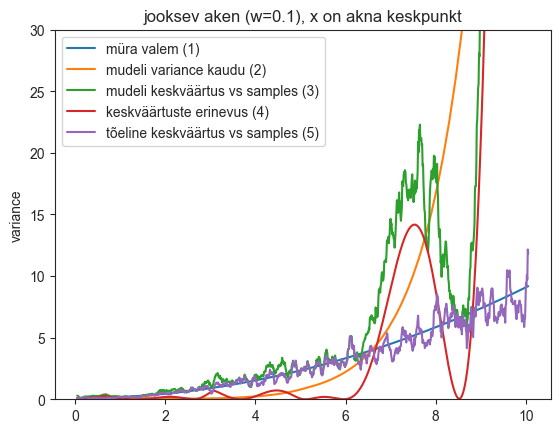

In [105]:
rmses = utils.joonista_rmses5x(model, start=0, end=10, steps=1000, fn=fn, akna_laius=0.1)

### hypo 1+4=3

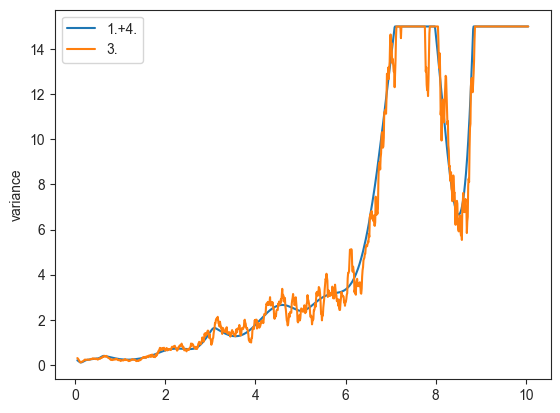

In [106]:
utils.joonista_hypotees_143(rmses)

### hypo 2 >= 1

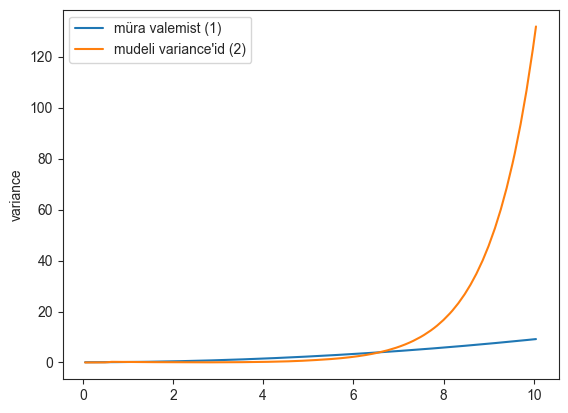

In [107]:
utils.joonista_hypotees_2gt1(rmses)

## Reverse fn, jätame keskmisesse piirkonda 2x vähem andmeid

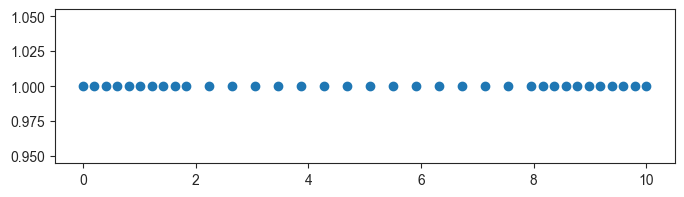

In [130]:
X_train = list(np.linspace(0, 10, 50))
del X_train[10:40:2]
X_train = np.array(X_train)

fig,ax = plt.subplots(figsize=(8,2))
ax.plot(X_train, [1]*len(X_train), 'o', label='train')

In [131]:
opt = keras.optimizers.Adam(learning_rate=0.003, amsgrad=True, epsilon=1e-3)
def fn (x): return x*np.sin(x)
model, h, (X_train, y_train, X_truth, ground_truth) = train_model_nb(X_train, nn_size=(10,10), optimizer=opt, batch_size=8, epochs=10000, fn=fn, reverse=True)

Epoch:   0 | Loss: 9.43153e+00
Epoch: 100 | Loss: 3.13896e+00
Epoch: 200 | Loss: 3.02811e+00
Epoch: 300 | Loss: 2.86982e+00
Epoch: 400 | Loss: 2.78657e+00
Epoch: 500 | Loss: 2.83469e+00
Epoch: 600 | Loss: 2.74457e+00
Epoch: 700 | Loss: 2.67940e+00
Epoch: 800 | Loss: 2.90505e+00
Epoch: 900 | Loss: 2.71816e+00
Epoch: 1000 | Loss: 2.64074e+00
Epoch: 1100 | Loss: 2.54954e+00
Epoch: 1200 | Loss: 2.56146e+00
Epoch: 1300 | Loss: 2.55248e+00
Epoch: 1400 | Loss: 2.54413e+00
Epoch: 1500 | Loss: 2.53417e+00
Epoch: 1600 | Loss: 2.54806e+00
Epoch: 1700 | Loss: 2.60343e+00
Epoch: 1800 | Loss: 2.49797e+00
Epoch: 1900 | Loss: 2.44455e+00
Epoch: 2000 | Loss: 2.46043e+00
Epoch: 2100 | Loss: 2.45019e+00
Epoch: 2200 | Loss: 2.53204e+00
Epoch: 2300 | Loss: 2.46185e+00
Epoch: 2400 | Loss: 2.38665e+00
Epoch: 2500 | Loss: 2.38461e+00
Epoch: 2600 | Loss: 2.48827e+00
Epoch: 2700 | Loss: 2.39990e+00
Epoch: 2800 | Loss: 2.40066e+00
Epoch: 2900 | Loss: 2.42410e+00
Epoch: 3000 | Loss: 2.37133e+00
Epoch: 3100 | Loss

model contains 15 breaks
63/63 [==============================] - 0s 4ms/step


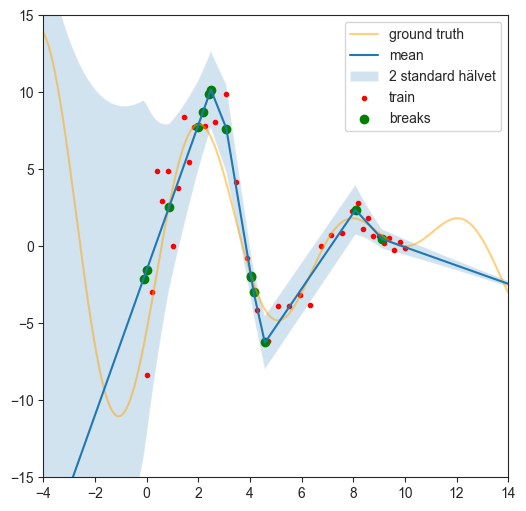

In [134]:
utils.joonista_variance(model, X_truth, X_train, y_train, xlim=(-4, 14),
                  ylim=(-15, 15), ground_truth=lambda x: (x*np.sin(x))[::-1])

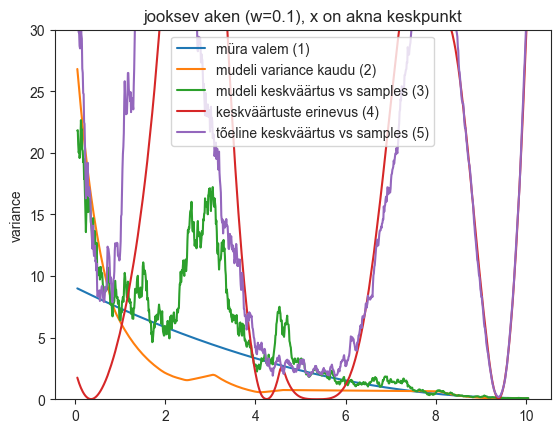

In [166]:
rmses = utils.joonista_rmses5x(model, start=0, end=10, steps=1000, akna_laius=0.1, analyytiline_myra=lambda x: 0.09*(10-x)**2+0.09, reverse=True)

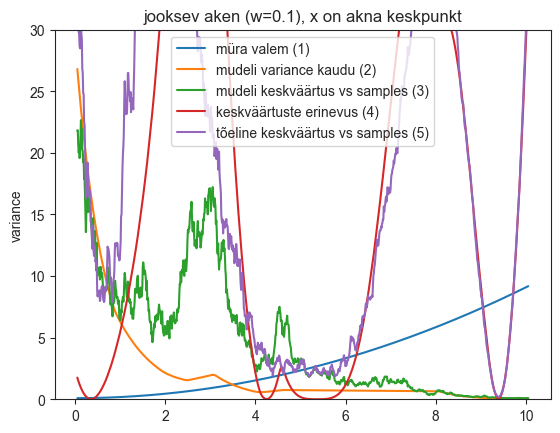

In [167]:
rmses = utils.joonista_rmses5x(model, start=0, end=10, steps=1000, akna_laius=0.1, reverse=True)

### hypo 1+4=3

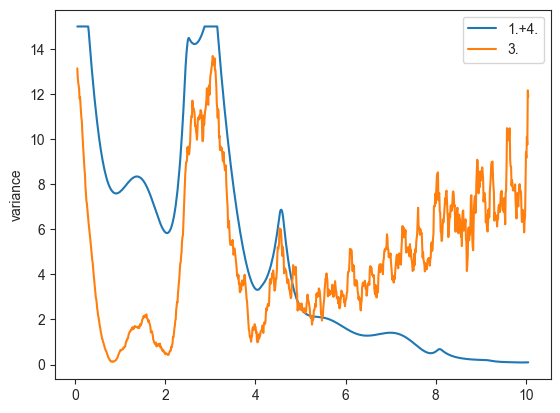

In [158]:
utils.joonista_hypotees_143(rmses)

### hypo 2 >= 1

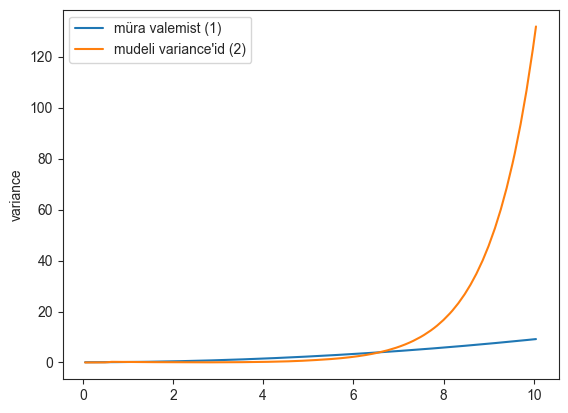

In [ ]:
utils.joonista_hypotees_2gt1(rmses)

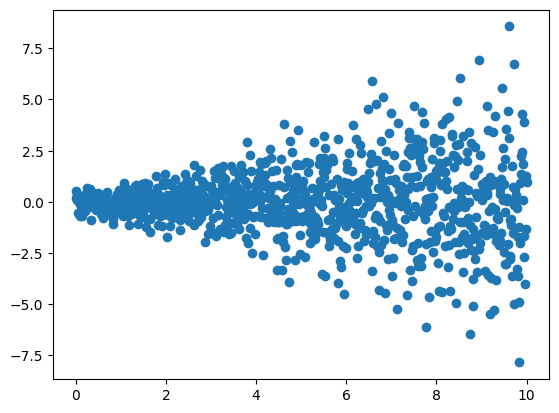

In [6]:
X = np.linspace(0, 10, 1000)
y = 0.3 * np.random.randn(len(X)) + 0.3 * X * np.random.randn(len(X))
plt.plot(X, y, 'o')

# log(variance) = log(sd**2) = 2*log(sd)
 